In [14]:
import os
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Diccionario para convertir meses de nombre a número
months = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
          'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthsn = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
MtoN = {a: b for a, b in zip(months, monthsn)}

In [15]:

# Función para convertir el archivo .txt a DataFrame
def TxtToCsv(path):
    try:
        with open(path, encoding='utf-8') as f:  # Leer archivo en utf-8
            lines = f.readlines()
    except UnicodeDecodeError:
        with open(path, encoding='latin1') as f:  # Si hay error con utf-8, intentar latin1
            lines = f.readlines()
    
    locations = [k for k, val in enumerate(lines) if val.find('---') != -1]
    names, text = [], []

    for k in range(len(locations) - 1):
        localLines = lines[locations[k]:locations[k+1]]
        names.append(localLines[1].strip())  # Nombre de la conferencia
        innerText = [val.strip() for val in localLines[2:]]
        text.append(' '.join(innerText))

    df = pd.DataFrame({'name': names, 'text': text})
    return df

In [16]:
# Carpeta base
basedir = './mananeras'  # Ajusta esta ruta si es necesario

# Lista para almacenar los DataFrames de todos los archivos
all_data = []

In [17]:
# Recorremos todas las carpetas (de año y mes) y los archivos dentro de ellas
for root, dirs, files in os.walk(basedir):
    for f in files:
        if f.endswith('.txt'):  # Solo procesamos archivos .txt
            path = os.path.join(root, f)
            
            # Extraemos año y mes desde la estructura de carpetas
            year = root.split(os.sep)[-2]  # El año está en la penúltima carpeta
            month = root.split(os.sep)[-1]  # El mes está en la última carpeta
            
            # Verificamos si el mes es válido
            if month not in MtoN:
                print(f"⚠️ Mes desconocido: {month} en {path}")
                continue

            # Extraemos el día desde el nombre del archivo (el primer par de dígitos)
            day = f.split('--')[0]

            # Formateamos la fecha en formato DD-MM-YYYY
            date = f"{day}-{MtoN[month]}-{year}"

            # Convertimos el archivo a DataFrame
            try:
                df = TxtToCsv(path)
                df['date'] = date
                all_data.append(df)
            except Exception as e:
                print(f"❌ Error procesando {path}: {e}")

In [18]:
# Si tenemos datos, los concatenamos
if all_data:
    df_final = pd.concat(all_data, ignore_index=True)
    print(f"✅ Total de registros procesados: {len(df_final)}")
else:
    print("⚠️ No se procesaron archivos.")

✅ Total de registros procesados: 150068


In [19]:
# Solo la primera vez (descarga las stopwords en español)
nltk.download('stopwords')

# Combina todos los textos en una sola cadena
full_text = ' '.join(df_final['text'].tolist())

# Limpieza básica del texto
def clean_text(text):
    text = text.lower()  # minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # quitar puntuación
    return text

full_text = clean_text(full_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Stopwords en español
stop_words = set(stopwords.words('spanish'))
# Puedes agregar palabras adicionales irrelevantes si quieres
custom_stopwords = stop_words.union({'presidente', 'méxico', 'mañanera', 'gobierno','bueno','ver','si',
                    'vamos','entonces','mil', 'día','va','aquí','usted','solamente','año','respecto', 'allá','van','dos','ahora','ser',
                      'gracias','así','ahí','hacer','hoy','pues','días','así','hacer','tener','puede','señor','tres','tema','caso','parte','hace','pueden','san',
                       'ir','ciento','cuenta','toda','mucha','voy','ayer','centavo' })

In [21]:
# Generar nube de palabras
wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      stopwords=custom_stopwords,
                      collocations=False).generate(full_text)

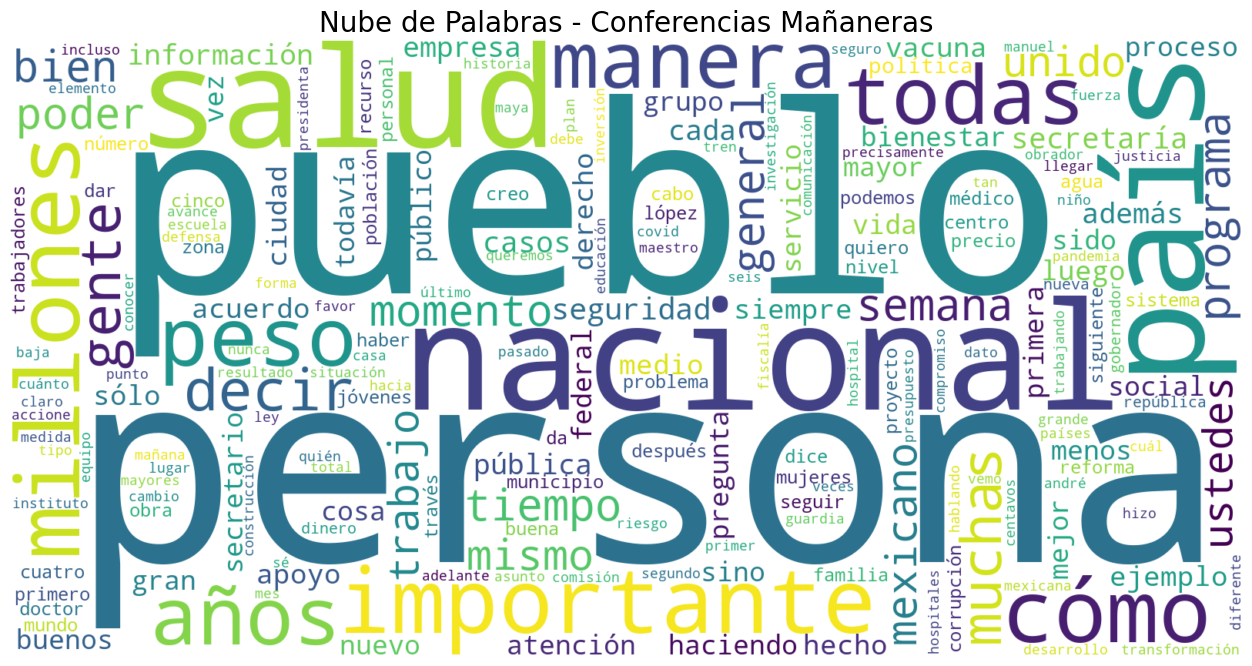

In [22]:
# Mostrar
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Conferencias Mañaneras', fontsize=20)
plt.show()



C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\1829346754.py:43: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dron\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


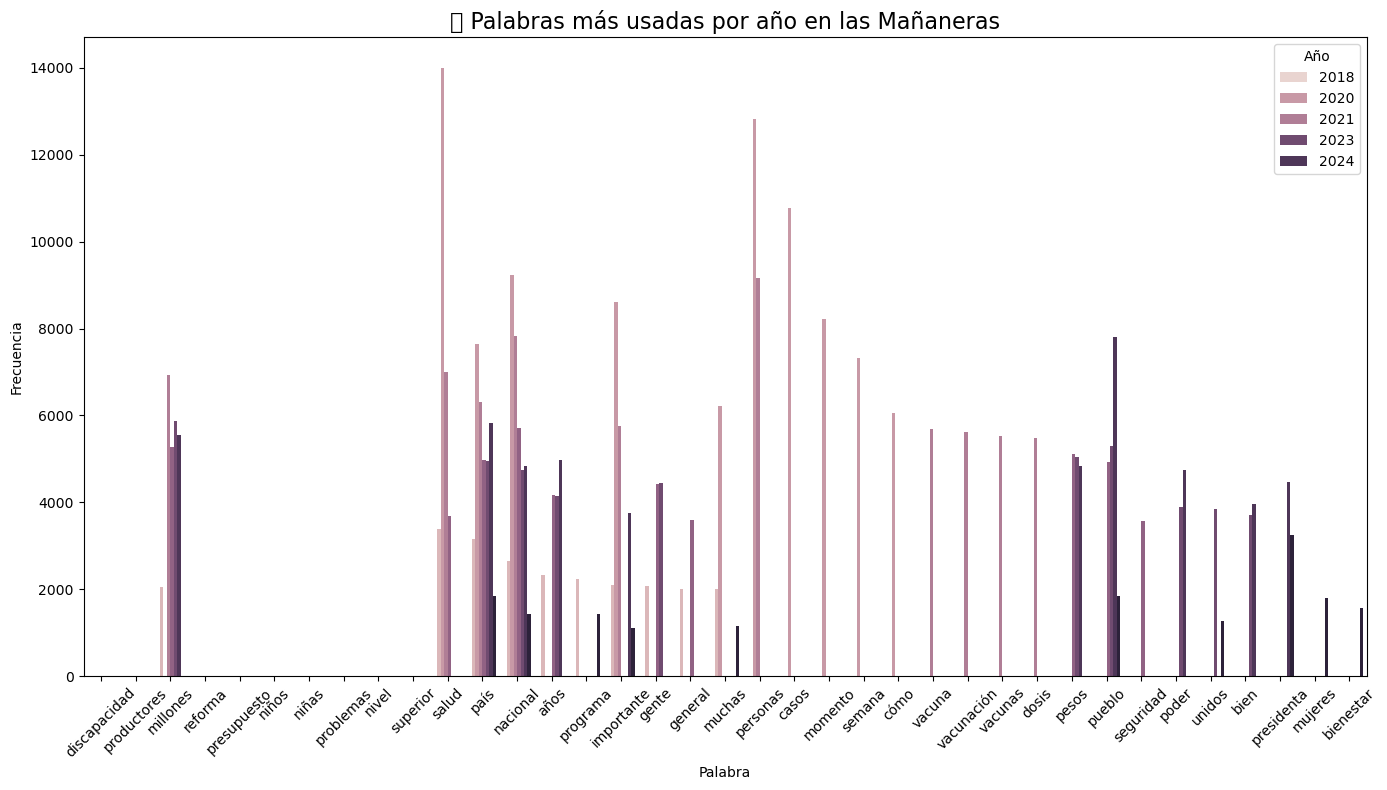

In [36]:
# Crear stopwords en español personalizadas
custom_stopwords = set(stopwords.words('spanish'))
custom_stopwords.update([
   'presidente', 'méxico', 'mañanera', 'gobierno','bueno','ver','si',
    'vamos','entonces','mil', 'día','va','aquí','usted','solamente','año','respecto', 'allá','van','dos','ahora','ser',
    'gracias','así','ahí','hacer','hoy','pues','días','así','hacer','tener','puede','señor','tres','tema','caso','parte','hace','pueden','san',
    'ir','ciento','cuenta','toda','mucha','voy','ayer','centavo','si','aquí','gracias','va','dos','laguna','aquí','señor','pues','ver','todas',
    'inaudible','cada','sino','ustedes','decir','manera'
    
])

# Añadir columna "year" al DataFrame
df_final['year'] = pd.to_datetime(df_final['date'], dayfirst=True).dt.year

# Diccionario para contar palabras por año
year_word_counts = {}

# Recorrer por año
for year in df_final['year'].unique():
    yearly_text = ' '.join(df_final[df_final['year'] == year]['text'].tolist())
    yearly_text = clean_text(yearly_text)
    tokens = [word for word in yearly_text.split() if word not in custom_stopwords]
    counter = Counter(tokens)
    most_common = counter.most_common(10)
    year_word_counts[year] = most_common

# Convertir a DataFrame para graficar
plot_data = []
for year, words in year_word_counts.items():
    for word, count in words:
        plot_data.append({'year': year, 'word': word, 'count': count})

df_plot = pd.DataFrame(plot_data)

# Gráfica
plt.figure(figsize=(14, 8))
sns.barplot(data=df_plot, x='word', y='count', hue='year')
plt.title('🔤 Palabras más usadas por año en las Mañaneras', fontsize=16)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\2085178091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', ax=axes[i], palette='Blues_d')
C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\2085178091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', ax=axes[i], palette='Blues_d')
C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\2085178091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', ax=axes[i], palette='Blues_d')
C:\Users\Dron\AppDa

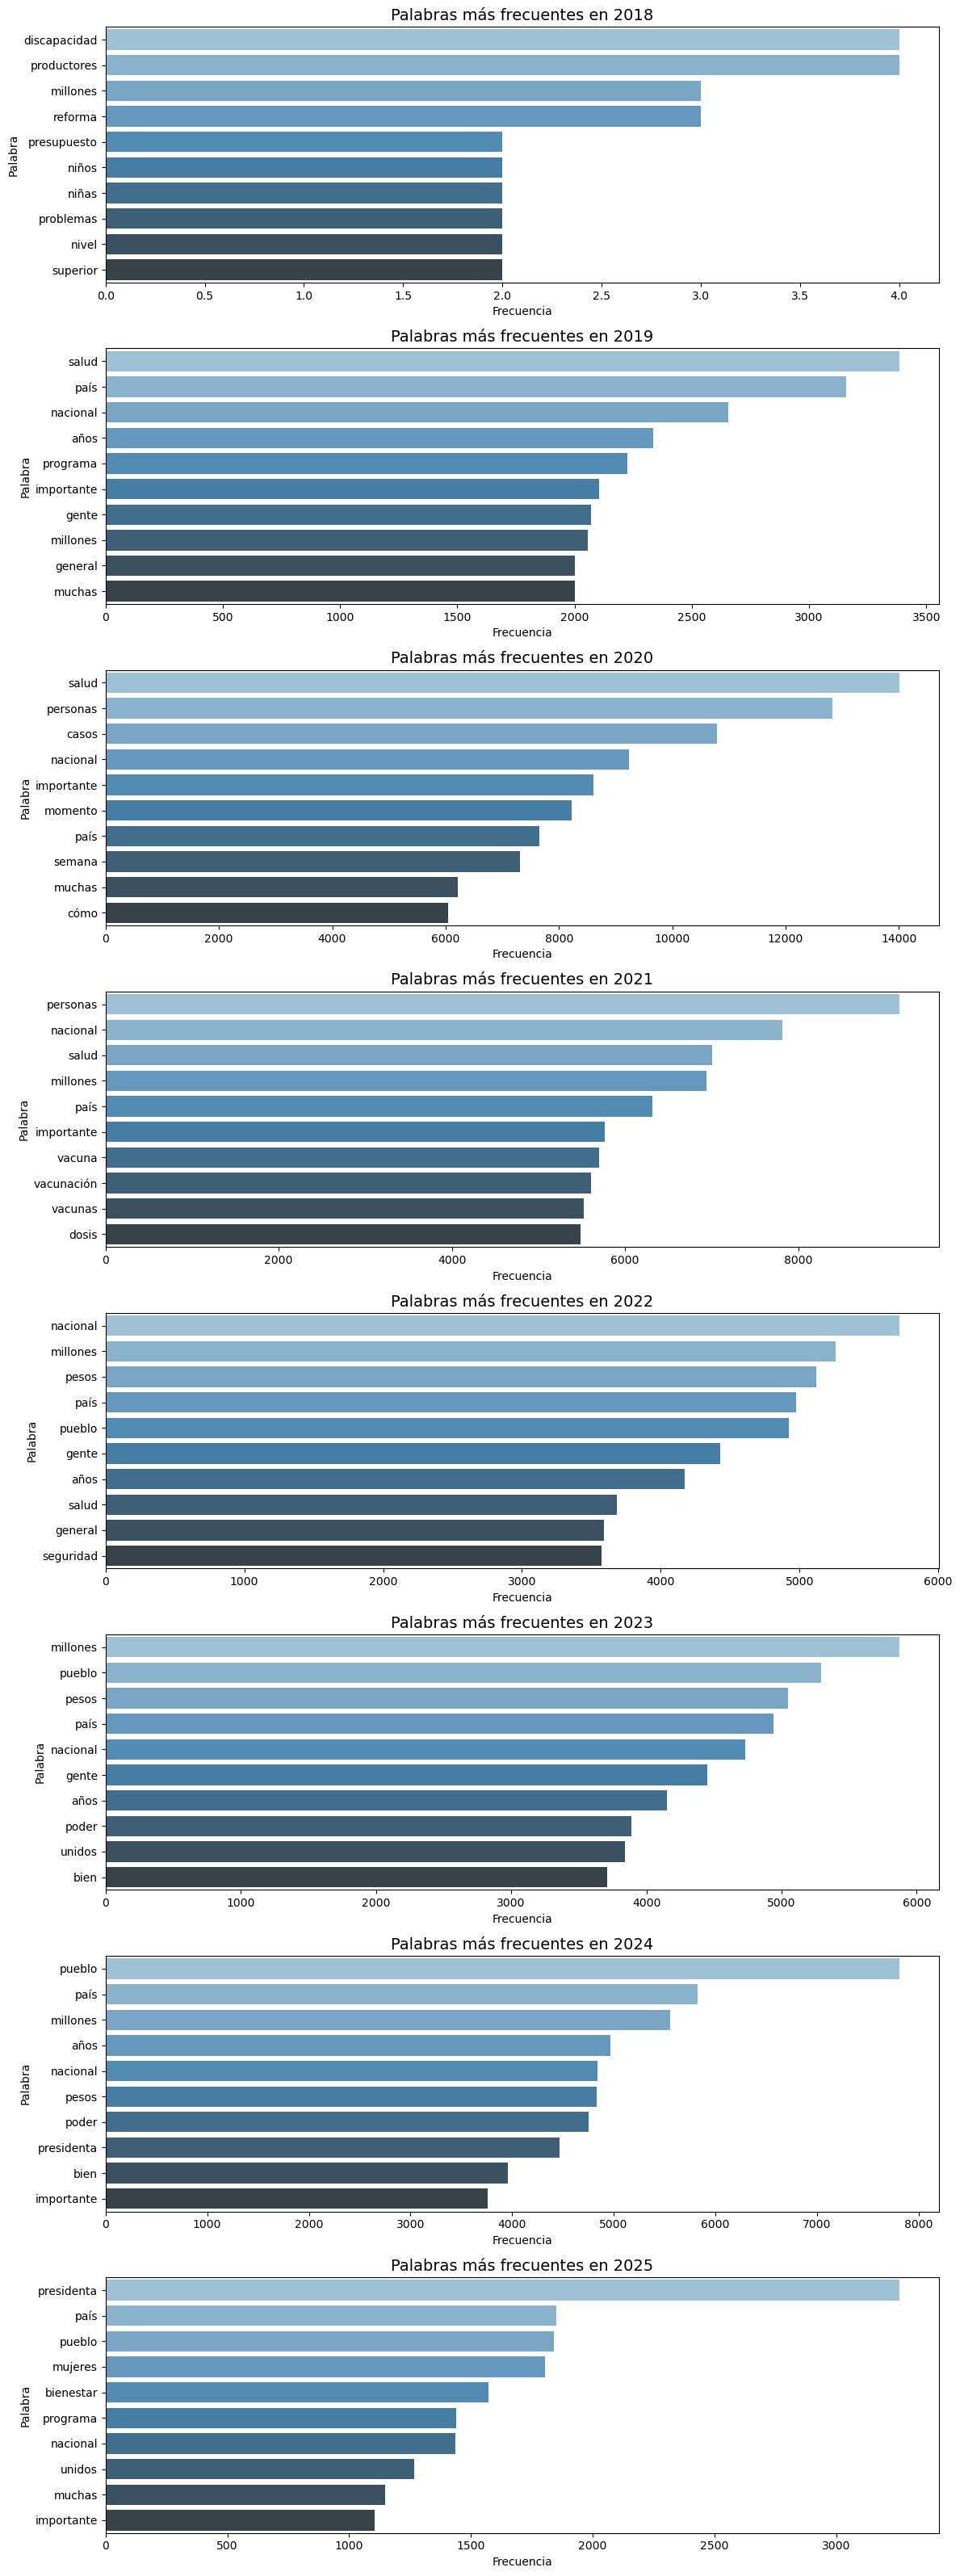

In [37]:
# Gráfico de subplots por año
unique_years = sorted(df_plot['year'].unique())
num_years = len(unique_years)

# Establecer el layout de subplots
fig, axes = plt.subplots(nrows=num_years, figsize=(12, 4 * num_years))

# Si solo hay un año, `axes` no es una lista, así que lo convertimos
if num_years == 1:
    axes = [axes]

# Crear un subplot por año
for i, year in enumerate(unique_years):
    data = df_plot[df_plot['year'] == year].sort_values('count', ascending=False)
    sns.barplot(data=data, x='count', y='word', ax=axes[i], palette='Blues_d')
    axes[i].set_title(f'Palabras más frecuentes en {year}', fontsize=14)
    axes[i].set_xlabel('Frecuencia')
    axes[i].set_ylabel('Palabra')

plt.tight_layout()
plt.show()


In [38]:
import os

# Crear carpeta si no existe
output_dir = 'graficas_por_anio'
os.makedirs(output_dir, exist_ok=True)

# Crear y guardar una gráfica por cada año
for year in unique_years:
    data = df_plot[df_plot['year'] == year].sort_values('count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='count', y='word', palette='crest')
    plt.title(f'Palabras más frecuentes en {year}', fontsize=14)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.tight_layout()

    # Guardar imagen
    filename = os.path.join(output_dir, f'palabras_{year}.png')
    plt.savefig(filename, dpi=300)
    plt.close()  # Cierra para no saturar memoria

    print(f'✅ Gráfica guardada: {filename}')


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2018.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2019.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2020.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2021.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2022.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2023.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2024.png


C:\Users\Dron\AppData\Local\Temp\ipykernel_16868\821405643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='word', palette='crest')


✅ Gráfica guardada: graficas_por_anio\palabras_2025.png


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
# Palabras clave con sus factores de peso (ajusta según tus necesidades)
PALABRAS_CLAVE = {
    "covid": 3.0,       # Estas palabras tendrán 3x más peso
    "pandemia": 2.5,
    "vacuna": 2.0,
    "inflación": 2.0,
    "gasolina": 1.8,
    "economía": 1.5,
    "amlo": 1.3,        # Ejemplo adicional
    "4t": 1.3           # Ejemplo adicional
}

class WeightAdjuster(BaseEstimator, TransformerMixin):
    """Aumenta el peso de palabras específicas en los vectores TF-IDF"""
    def __init__(self, word_weights):
        self.word_weights = word_weights
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X = X.copy()  # Evita modificar el original
        for word, weight in self.word_weights.items():
            col_index = self.vocabulary_.get(word)
            if col_index is not None:
                X[:, col_index] *= weight
        return X

In [30]:
# Pipeline modificado con ajuste de pesos
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=1000,
        stop_words=list(custom_stopwords),
        lowercase=True,
        strip_accents='unicode'
    )),
    ('adjust_weights', WeightAdjuster(PALABRAS_CLAVE)),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

# Necesitamos extraer el vocabulario después de TF-IDF
# Por eso usamos este wrapper
class VocabularyExtractor:
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X

full_model = Pipeline([
    ('tfidf', model.named_steps['tfidf']),
    ('ve', VocabularyExtractor()),
    ('adjust_weights', WeightAdjuster(PALABRAS_CLAVE)),
    ('clf', model.named_steps['clf'])
])

# Ajuste especial para pasar el vocabulario
def custom_fit(model, X, y):
    X_tfidf = model.named_steps['tfidf'].fit_transform(X)
    model.named_steps['adjust_weights'].vocabulary_ = model.named_steps['tfidf'].vocabulary_
    model.named_steps['clf'].fit(X_tfidf, y)
    return model

# Entrenamiento con el modelo modificado
print("⏳ Entrenando el clasificador con palabras ponderadas...")
model = custom_fit(full_model, X_train, y_train)

⏳ Entrenando el clasificador con palabras ponderadas...


C:\Users\Dron\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahi', 'alla', 'ano', 'aqui', 'asi', 'dia', 'dias', 'eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mananera', 'mas', 'mexico', 'mia', 'mias', 'mio', 'mios', 'seais', 'senor', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 

In [31]:
# Obtener las palabras más importantes por año
feature_names = model.named_steps['tfidf'].get_feature_names_out()

print("\n🔍 Palabras clave y sus pesos:")
for word, weight in PALABRAS_CLAVE.items():
    if word in feature_names:
        idx = list(feature_names).index(word)
        print(f"{word:<15} → Factor: {weight}x → Peso real en modelo: {model.named_steps['clf'].coef_[:, idx].mean():.2f}")

# Mostrar palabras más influyentes por año
for i, year in enumerate(model.named_steps['clf'].classes_):
    print(f"\n📅 Año {year} - Palabras más influyentes:")
    coefs = model.named_steps['clf'].coef_[i]
    top_indices = coefs.argsort()[-10:][::-1]
    for idx in top_indices:
        print(f"{feature_names[idx]:<20} {coefs[idx]:.2f}")


🔍 Palabras clave y sus pesos:
covid           → Factor: 3.0x → Peso real en modelo: -0.00
pandemia        → Factor: 2.5x → Peso real en modelo: 0.00
vacuna          → Factor: 2.0x → Peso real en modelo: -0.00
gasolina        → Factor: 1.8x → Peso real en modelo: 0.00

📅 Año 2018 - Palabras más influyentes:
inaudible            0.97
discapacidad         0.55
productores          0.38
ninas                0.21
cada                 0.20
elecciones           0.19
problemas            0.18
demas                0.18
superior             0.17
nunca                0.17

📅 Año 2019 - Palabras más influyentes:
hospital             2.89
discapacidad         2.73
2019                 2.34
crecimiento          2.31
ciudadanos           2.21
cuarta               2.11
decirles             2.09
mensaje              2.02
2018                 2.02
indigenas            1.99

📅 Año 2020 - Palabras más influyentes:
epidemia             4.26
covid                4.20
pandemia             4.15
noches       